<a href="https://colab.research.google.com/github/AndreMaulanaMustofa/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

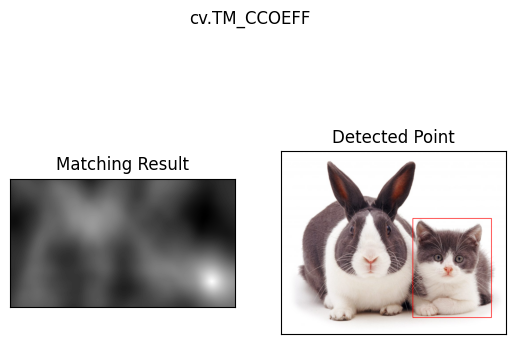

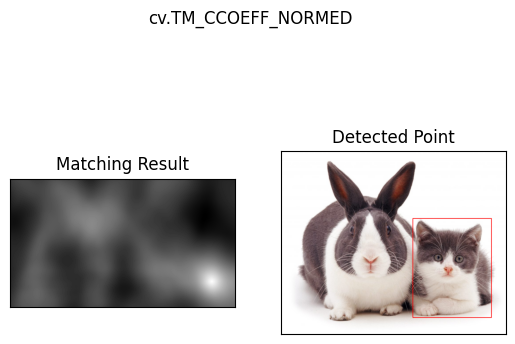

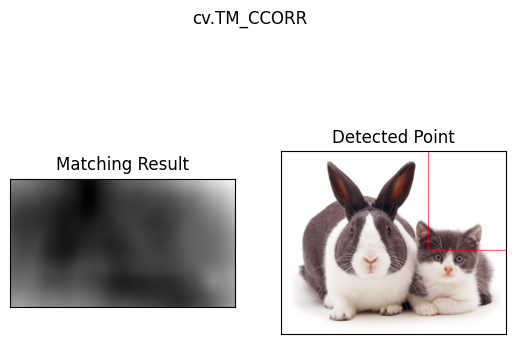

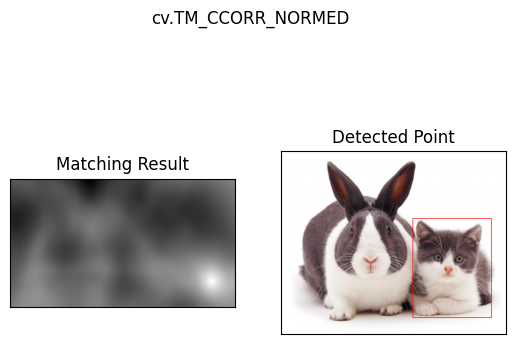

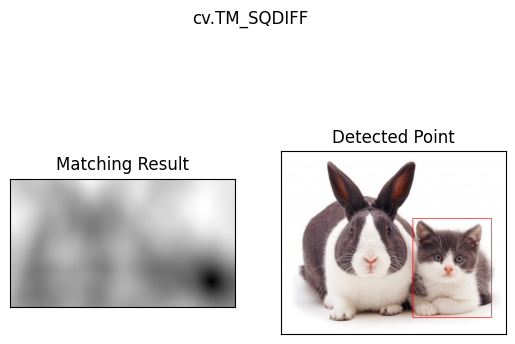

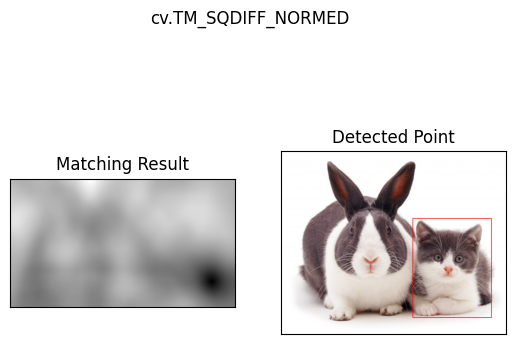

In [ ]:
img = cv.imread('/content/drive/MyDrive/Andre/cats_and_bunnies.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img2 = img.copy()

template = cv.imread('/content/drive/MyDrive/Andre/cat2_templatejpg.jpg')

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

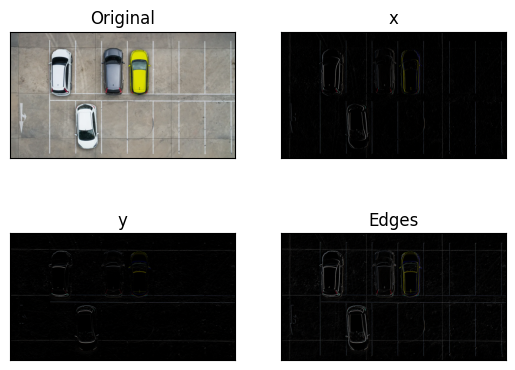

In [ ]:
# Membaca Image
imgpath = "/content/drive/MyDrive/Andre/car-park.jpg"
img = cv.imread(imgpath, 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mencari edge dengan edgesx dan edgesy 
edgesx = cv.Sobel(img, -1, dx=1, dy=0, ksize=1)
edgesy = cv.Sobel(img, -1, dx=0, dy=1, ksize=1)

edges = edgesx + edgesy

output = [img, edgesx, edgesy, edges]
titles = ['Original', 'x', 'y', 'Edges']

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

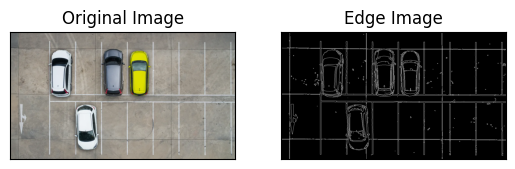

In [ ]:
# Baca Image
img = cv.imread('/content/drive/MyDrive/Andre/car-park.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
edges = cv.Canny(img,100,200)

# Pemrosesan Image
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# Render Image
plt.show()

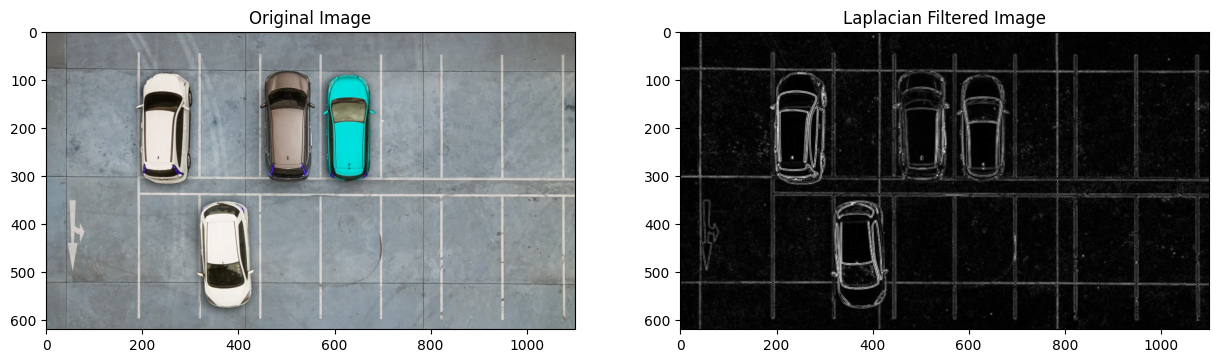

In [ ]:
image_original = cv.imread('/content/drive/MyDrive/Andre/car-park.jpg')
image_original = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menghilangkan Noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# Mengurangi Noise Pada Image
img = cv.GaussianBlur(image_gray,(3,3),0)

# Filter Image dengan Filter 2D
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)

# Rubah Kembali ke Uint8
filtered_image = cv.convertScaleAbs(filtered_image)

# Hasil Proses
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')